<a id="overview"></a>
# <p style="background-color: #E7AC66; font-family:rockwell; color:black; font-size:250%; text-align:center; border: 5px solid  #5F5447; border-radius: 40px 100px;">Patient Readmission Solution</p>

In [1]:
# Importing Essential Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import warnings
from IPython.display import display
import joblib

<a id="overview"></a>
# <p style="background-color: #CAD2B0; font-family:rockwell; color:black; font-size:200%; text-align:center; border: 5px solid   #F8FAF1; border-radius: 100px 40px;">Exploratory Data Analysis📊</p>

In [2]:
df = pd.read_csv('hospital_readmission_dataset.csv')
df.head()

,Age,Gender,Chronic_Disease,Smoker,Number_of_Medications,Previous_Admissions,BMI,Days_Since_Last_Admission,Risk_of_Readmission
0,43,Female,Hypertension,1,10.187984,2,30.817931,359.0,High Risk
1,30,Male,Hypertension,0,6.318891,2,27.764200,365.0,Low Risk
2,58,Female,No Chronic Disease,0,6.945288,0,25.548864,NaN,No Risk
3,58,Male,Hypertension,0,6.289351,1,23.456799,45.0,Low Risk
4,31,Female,Hypertension,0,7.752656,3,37.279243,112.0,Medium Risk


In [3]:
df.shape

(1500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1500 non-null   int64  
 1   Gender                     1500 non-null   object 
 2   Chronic_Disease            1500 non-null   object 
 3   Smoker                     1500 non-null   int64  
 4   Number_of_Medications      1470 non-null   float64
 5   Previous_Admissions        1500 non-null   int64  
 6   BMI                        1457 non-null   float64
 7   Days_Since_Last_Admission  1310 non-null   float64
 8   Risk_of_Readmission        1500 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 105.6+ KB


In [5]:
df.describe()

,Age,Smoker,Number_of_Medications,Previous_Admissions,BMI,Days_Since_Last_Admission
count,1500.000000,1500.000000,1470.000000,1500.000000,1457.000000,1310.000000
mean,54.928000,0.254000,5.803677,2.262000,28.088342,148.510502
std,16.312251,0.435443,2.278356,1.542382,5.036193,120.370064
min,20.000000,0.000000,1.000000,0.000000,15.000000,-68.162685
25%,41.000000,0.000000,4.161369,1.000000,24.716620,45.000000
50%,56.000000,0.000000,5.779652,2.000000,28.116108,116.000000
75%,70.000000,1.000000,7.293073,3.000000,31.472069,247.545535
max,88.000000,1.000000,12.771223,8.000000,43.223967,365.000000


In [6]:
df.isna().sum()

Age                            0
Gender                         0
Chronic_Disease                0
Smoker                         0
Number_of_Medications         30
Previous_Admissions            0
BMI                           43
Days_Since_Last_Admission    190
Risk_of_Readmission            0
dtype: int64

<a id="overview"></a>
# <p style="background-color: #CAD2B0; font-family:rockwell; color:black; font-size:130%; text-align:center; border: 5px solid #F8FAF1; border-radius:100px 40px;">Feature Engineering and Pre-Processing🛠️</p>

In [21]:
# Handle missing values
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['Number_of_Medications'].fillna(df['Number_of_Medications'].median(), inplace=True)
df['Days_Since_Last_Admission'].fillna(df['Days_Since_Last_Admission'].median(), inplace=True)


warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df = pd.get_dummies(df, columns=['Chronic_Disease'], prefix='Disease')
le = LabelEncoder()
df['Risk_of_Readmission'] = le.fit_transform(df['Risk_of_Readmission'])  # No=0, Low=1, Medium=2, High=3

warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'Number_of_Medications', 'Previous_Admissions', 'BMI', 'Days_Since_Last_Admission']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [10]:
# Train-Test Split
X = df.drop(columns=['Risk_of_Readmission'])
y = df['Risk_of_Readmission']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

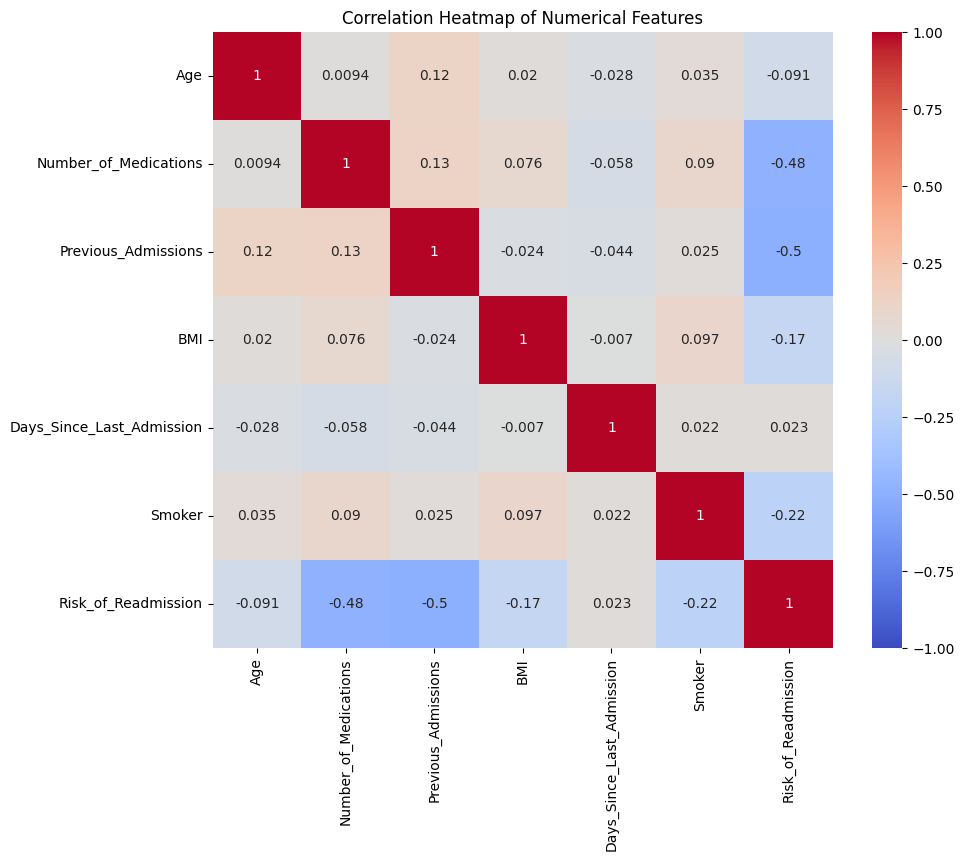

In [11]:
# Correlation Heatmap

corr_df = df[['Age', 'Number_of_Medications', 'Previous_Admissions', 'BMI', 'Days_Since_Last_Admission', 'Smoker', 'Risk_of_Readmission']].copy()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<a id="overview"></a>
# <p style="background-color: #CAD2B0; font-family:rockwell; color:black; font-size:150%; text-align:center; border: 5px solid #F8FAF1; border-radius:100px 40px;">Model Implementation</p>

In [12]:
# Training Three Models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

In [13]:
# Storing results to save time
results = {'Model': [], 'Train Accuracy': [], 'Validation Accuracy': [], 'Test Accuracy': []}
confusion_matrices = {}

for name, model in models.items():

    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    results['Model'].append(name)
    results['Train Accuracy'].append(train_acc)
    results['Validation Accuracy'].append(val_acc)
    results['Test Accuracy'].append(test_acc)
    
    confusion_matrices[name] = confusion_matrix(y_test, y_test_pred)
    res = pd.DataFrame(results)

<a id="overview"></a>
# <p style="background-color: #CAD2B0; font-family:rockwell; color:black; font-size:150%; text-align:center; border: 5px solid #F8FAF1; border-radius:100px 40px;">Model Evaluation</p>

In [15]:
# I will save classification report of all the models in a DataFrame to have a better visualization:

all_reports = {}

for name, model in models.items():
    y_test_pred = model.predict(X_test)
    
    report_dict = classification_report(
        y_test,
        y_test_pred,
        target_names=['No Risk', 'Low Risk', 'Medium Risk', 'High Risk'],
        output_dict=True
    )
    
    report_df = pd.DataFrame(report_dict).transpose()
    report_df.loc[['macro avg', 'weighted avg'], 'support'] = None
    report_df = report_df.round(2)
    
    all_reports[name] = report_df

for name, fd in all_reports.items():
    print(f"\n{name} Classification Report:")
    display(fd)


Decision Tree Classification Report:


,precision,recall,f1-score,support
No Risk,0.91,0.64,0.75,45.00
Low Risk,0.59,0.73,0.65,66.00
Medium Risk,0.61,0.65,0.63,60.00
High Risk,0.81,0.70,0.75,54.00
accuracy,0.68,0.68,0.68,0.68
macro avg,0.73,0.68,0.70,NaN
weighted avg,0.71,0.68,0.69,NaN



Random Forest Classification Report:


,precision,recall,f1-score,support
No Risk,0.84,0.71,0.77,45.00
Low Risk,0.72,0.77,0.74,66.00
Medium Risk,0.62,0.70,0.66,60.00
High Risk,0.96,0.85,0.90,54.00
accuracy,0.76,0.76,0.76,0.76
macro avg,0.78,0.76,0.77,NaN
weighted avg,0.77,0.76,0.76,NaN



SVM Classification Report:


,precision,recall,f1-score,support
No Risk,0.91,0.96,0.93,45.00
Low Risk,0.94,0.91,0.92,66.00
Medium Risk,0.89,0.92,0.90,60.00
High Risk,0.98,0.94,0.96,54.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.93,0.93,0.93,NaN
weighted avg,0.93,0.93,0.93,NaN


<Figure size 1200x1200 with 0 Axes>

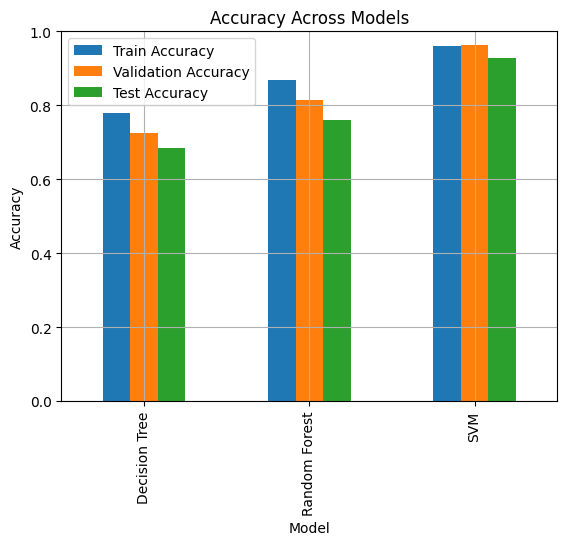

In [16]:
# Visualization of Model Performance
plt.figure(figsize=(12, 12))
res.set_index('Model')[['Train Accuracy', 'Validation Accuracy', 'Test Accuracy']].plot(kind='bar')
plt.title('Accuracy Across Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

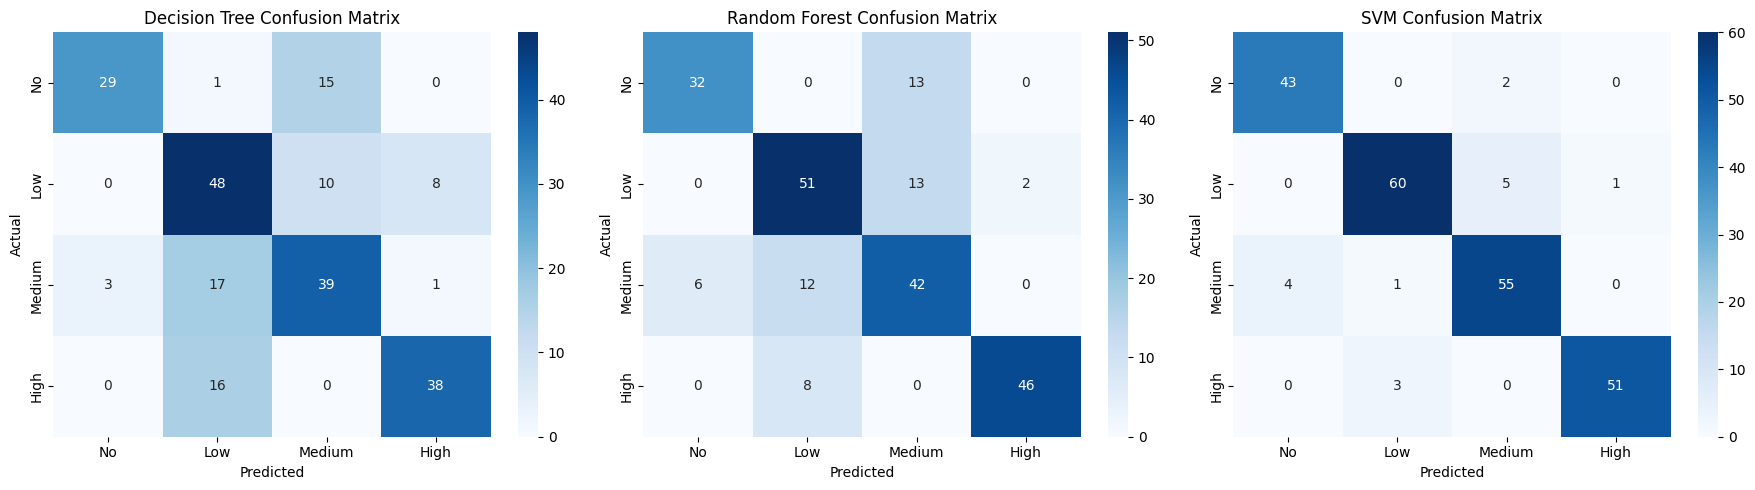

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

for idx, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['No', 'Low', 'Medium', 'High'],
                yticklabels=['No', 'Low', 'Medium', 'High'])
    axes[idx].set_title(f'{name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [18]:
# Model Performance Comparison
print("Model Performance Comparison:")
res

Model Performance Comparison:


,Model,Train Accuracy,Validation Accuracy,Test Accuracy
0,Decision Tree,0.780000,0.724444,0.684444
1,Random Forest,0.869524,0.813333,0.760000
2,SVM,0.960952,0.964444,0.928889


<Figure size 600x600 with 0 Axes>

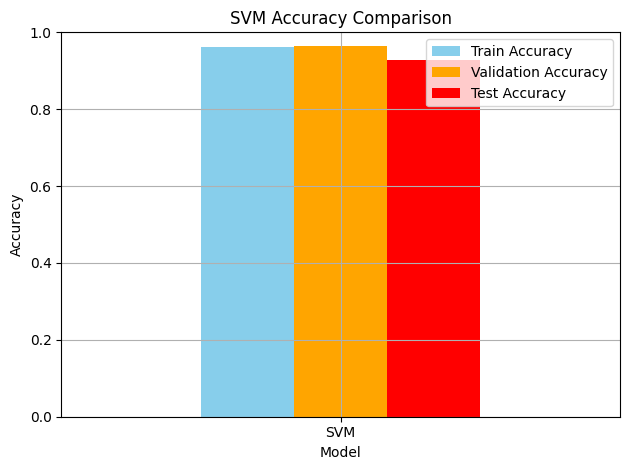

In [19]:
# We will now visualize SVM results only
svm_results = {
    'Model': ['SVM'],
    'Train Accuracy': [0.960952],
    'Validation Accuracy': [0.964444],
    'Test Accuracy': [0.928889]
}

svm_df = pd.DataFrame(svm_results)

# Plot
plt.figure(figsize=(6, 6))
svm_df.set_index('Model')[['Train Accuracy', 'Validation Accuracy', 'Test Accuracy']].plot(kind='bar', color=['skyblue', 'orange', 'red'])
plt.title('SVM Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


# <p style="background-color: #CAD2B0; font-family:rockwell; color:black; font-size:150%; text-align:center; border: 5px solid #F8FAF1; border-radius:100px 40px;">Pickling Model</p>

In [26]:
# Since it is the best performing model. I will now convert the resuls of SVM to a pickle file to integrate the model in my website.

joblib.dump(models['SVM'], 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

# <p style="background-color: #E7AC66; font-family:rockwell; color:black; font-size7050%; text-align:center; border: 5px solid #CAD2B0; border-radius: 25px 100px;">"Torture the data, and it will confess to anything."<br>Ronald Coase<br><br>Thanks✨</p>